In [1]:

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
! pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autoviz 0.1.55 requires matplotlib>=3.3.3, but you have matplotlib 3.1.3 which is incompatible.


In [3]:
df=pd.read_csv('/content/mcdonalds.csv')

In [4]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [7]:
binary=['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']
df[binary] = df[binary].apply(lambda x:x.map({'Yes':1, 'No':0}))

In [8]:
def discover(df, target=''):
    
    #Creating Seris with Feature Types, removing the target feature
    if target != '':
        df1 = df.drop(target, axis = 1, inplace = False)
    else:
        df1 = df

    #listing feature type
    feature_type = []
    for j in range(len(df1.columns)):
        if df1[df1.columns[j]].nunique()==2:
            feature_type.append('Binary')
        elif df1[df1.columns[j]].dtypes != 'O' and df1[df1.columns[j]].nunique()>10:
            feature_type.append('Numerical')
        elif df1[df1.columns[j]].dtypes != 'O' and df1[df1.columns[j]].nunique()<10:
            feature_type.append('Ordinal')
        elif df1[df1.columns[j]].nunique()<10:
            feature_type.append('Ordinal')
        else:
            feature_type.append('Identifier')
    
    #listing feature content
    features_content = []
    for i in range(len(df1.columns)):
        if df1[df1.columns[i]].nunique()<10: 
            features_content.append(df1[df1.columns[i]].unique())
        else:
            features_content.append('n = ' + str(df1[df1.columns[i]].nunique()))
            
    #listing empty cells feature type
    num_of_empty = []
    for k in df1.columns:
        num_of_empty.append(df1[k].isnull().sum())

    #listing empty cells ratio feature type
    ratio_of_empty = []
    for k in df1.columns:
        ratio_of_empty.append(round(100*df1[k].isnull().sum()/df1[k].isnull().count(),2))
    
    discovered = pd.DataFrame({'Features': df1.columns, 
                               'Features Content': features_content, 
                               'Feature Type': feature_type, 
                               'Empty Cells': num_of_empty,
                               '% Empty': ratio_of_empty
                             })
    discovered = discovered.sort_values(['Feature Type','Empty Cells'],ascending=False)
    print("Shape of Dataset: ",df.shape)
    return discovered

In [9]:
discover(df)

Shape of Dataset:  (1453, 15)


,Features,Features Content,Feature Type,Empty Cells,% Empty
13,VisitFrequency,"[Every three months, Once a week, Once a month...",Ordinal,0,0.0
12,Age,n = 54,Numerical,0,0.0
11,Like,n = 11,Identifier,0,0.0
0,yummy,"[0, 1]",Binary,0,0.0
1,convenient,"[1, 0]",Binary,0,0.0
2,spicy,"[0, 1]",Binary,0,0.0
3,fattening,"[1, 0]",Binary,0,0.0
4,greasy,"[0, 1]",Binary,0,0.0
5,fast,"[1, 0]",Binary,0,0.0
6,cheap,"[1, 0]",Binary,0,0.0


In [10]:
df.VisitFrequency.unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [11]:
df.Like.unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [12]:
round(df[binary].mean(),2)*100

yummy         55.0
convenient    91.0
spicy          9.0
fattening     87.0
greasy        53.0
fast          90.0
cheap         60.0
tasty         64.0
expensive     36.0
healthy       20.0
disgusting    24.0
dtype: float64

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca=PCA()

In [15]:
X=df[binary]

In [16]:
prince=pca.fit_transform(X)

In [17]:
pdf=pd.DataFrame(data=prince,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11'])

In [18]:
comp=pd.DataFrame(pca.components_.T,index=binary,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11'])*-1

In [19]:
comp

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
yummy,0.476933,-0.363790,0.304444,-0.055162,0.307535,-0.170738,0.280519,-0.013041,-0.572403,0.110284,-0.045439
convenient,0.155332,-0.016414,0.062515,0.142425,-0.277608,0.347830,0.059738,0.113079,0.018465,0.665818,0.541616
spicy,0.006356,-0.018809,0.037019,-0.197619,-0.070620,0.355087,-0.707637,-0.375934,-0.400280,0.075634,-0.141730
fattening,-0.116232,0.034094,0.322359,0.354139,0.073405,0.406515,0.385943,-0.589622,0.160512,0.005338,-0.250910
greasy,-0.304443,0.063839,0.802373,-0.253960,-0.361399,-0.209347,-0.036170,0.138241,0.002847,-0.008707,-0.001642
fast,0.108493,0.086972,0.064642,0.097363,-0.107930,0.594632,0.086846,0.627799,-0.166197,-0.239532,-0.339265
cheap,0.337186,0.610633,0.149310,-0.118958,0.128973,0.103241,0.040449,-0.140060,-0.076069,-0.428087,0.489283
tasty,0.471514,-0.307318,0.287265,0.002547,0.210899,0.076914,-0.360453,0.072792,0.639086,-0.079184,-0.019552
expensive,-0.329042,-0.601286,-0.024397,-0.067816,0.003125,0.261342,0.068385,-0.029539,-0.066996,-0.454399,0.490069
healthy,0.213711,-0.076593,-0.192051,-0.763488,-0.287846,0.178226,0.349616,-0.176303,0.185572,0.038117,-0.157608


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

AxesSubplot(0.125,0.125;0.775x0.755)


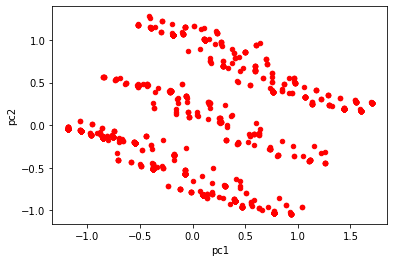

In [21]:
ax1 = pdf.plot(kind='scatter', x='pc1', y='pc2',color='r')
print(ax1) 

In [22]:
pca.explained_variance_

array([0.57312398, 0.36900226, 0.2546408 , 0.15904032, 0.11384214,
       0.09627033, 0.08392454, 0.07569209, 0.07035814, 0.06192225,
       0.05612296])

<BarContainer object of 11 artists>

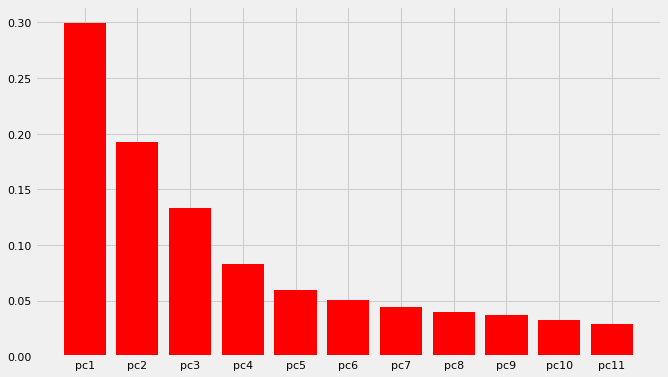

In [38]:
plt.figure(figsize = (10,6))
plt.bar(['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11'],pca.explained_variance_ratio_,color='red')

In [41]:
from sklearn.cluster import KMeans

In [45]:
wcss = [] 
for k in range(1,20):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42) 
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

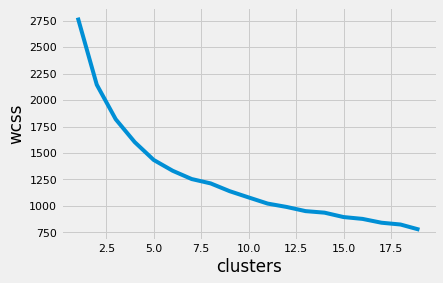

In [49]:
#Elbow Method
plt.plot(range(1,20),wcss)
plt.xlabel("clusters")
plt.ylabel("wcss")
plt.show()

In [51]:
kmeans = KMeans(8)
kmeans.fit(X)

KMeans()

In [53]:
kmeans.labels_.shape

(1453,)

In [57]:
df_1=pd.concat([X,pd.DataFrame({'cluster':kmeans.labels_})], axis = 1)

In [58]:
df_1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2
1,1,1,0,1,1,1,1,1,1,0,0,5
2,0,1,1,1,1,1,0,1,1,1,0,3
3,1,1,0,1,1,1,1,1,0,0,1,5
4,0,1,0,1,1,1,1,0,0,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,1
1449,1,1,0,1,0,0,1,1,0,1,0,0
1450,1,1,0,1,0,1,0,1,1,0,0,3
1451,1,1,0,0,0,1,1,1,0,1,0,0


In [59]:
group=df_1.groupby(['cluster'])
group.mean()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
cluster,,,,,,,,,,,
0,0.919811,0.985849,0.155660,0.566038,0.259434,0.952830,0.886792,0.976415,0.150943,1.000000,0.061321
1,0.021277,0.627660,0.074468,0.968085,0.877660,0.739362,0.074468,0.074468,0.925532,0.037234,0.861702
2,0.007407,0.933333,0.051852,0.851852,0.000000,0.992593,1.000000,0.325926,0.037037,0.074074,0.200000
3,0.926941,0.958904,0.091324,0.954338,0.611872,0.849315,0.000000,0.963470,1.000000,0.159817,0.073059
4,1.000000,0.968421,0.078947,0.868421,0.000000,0.968421,0.884211,0.973684,0.026316,0.000000,0.015789
5,0.834746,0.978814,0.084746,0.983051,1.000000,0.953390,0.877119,0.949153,0.080508,0.000000,0.114407
6,0.005917,0.863905,0.094675,0.976331,1.000000,0.940828,0.934911,0.100592,0.005917,0.071006,0.556213
7,0.115385,0.913462,0.105769,0.692308,0.057692,0.759615,0.000000,0.326923,0.625000,0.125000,0.105769
